# 3.2 배열의 생성과 변형
---

## 1. Numpy의 자료형 

1. np.array 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면 dtype 인수를 사용한다.  (만약 dtype 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추한다.)  
2. 만들어진 배열의 자료형을 알아내려면 dtype 속성을 보면 된다.

In [1]:
x = np.array([1, 2, 3])
x.dtype

dtype('int32')

In [2]:
x = np.array([1.0, 2.0, 3.0])
x.dtype

dtype('float64')

In [3]:
x = np.array([1, 2, 3.0])
x.dtype

dtype('float64')

### *dtype* 인수로 자료형 지정
dtype 인수로 지정할 자료형은 다음 표에 보인것과 같은 “dtype 접두사”로 시작하는 문자열이고 이 글자 뒤에 오는 숫자는 바이트 수 혹은 글자 수를 의미한다. 예를 들어 **f8은 8바이트(64비트) 부동소수점 실수**를 뜻하고 U4 는 4글자 유니코드 문자열을 뜻한다. **숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정한다.**

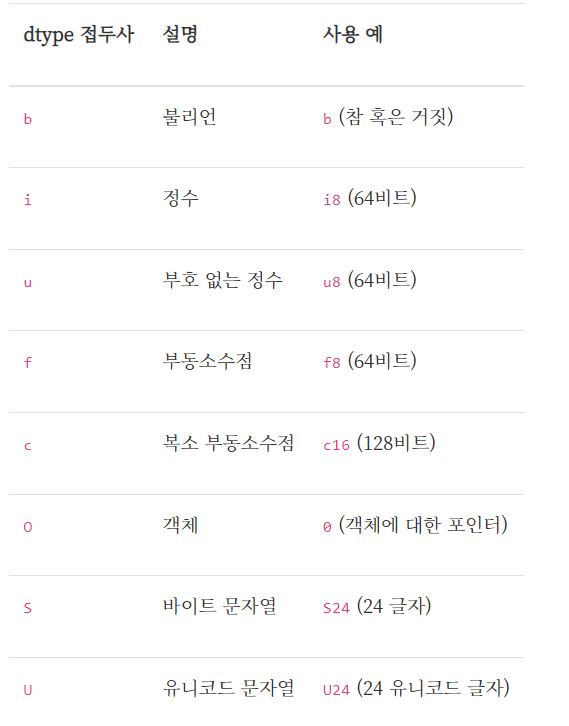

In [12]:
x = np.array([1, 2, 3], dtype='f')
x.dtype

dtype('float32')

In [13]:
x[0] + x[1]

3.0

In [14]:
x = np.array([1, 2, 3], dtype='U')
x.dtype

dtype('<U1')

In [15]:
x[0] + x[1]

'12'

## 2. Inf와 NaN 
넘파이에서는 무한대를 표현하기 위한 np.inf(infinity)와 정의할 수 없는 숫자를 나타내는 np.nan(not a number)을 사용할 수 있다.  

다음 예와 같이 
1. 1을 0으로 나누려고 하거나 
2. 0에 대한 로그 값을 계산하면 무한대인 np.inf이 나온다. 
3. 0을 0으로 나누려고 시도하면 np.nan이 나온다.

In [16]:
np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

array([  0.,  inf, -inf,  nan])

In [17]:
np.log(0)

-inf

In [18]:
# exp(-inf) = e^-inf == 0
np.exp(-np.inf)

0.0

## 3. 배열 생성 
NumPy는 몇가지 단순한 배열을 생성하는 명령을 제공한다.
- zeros, ones : 다차원 배열을 각각 0또는 1로 초기화하여 크기를 정해 생성한다.
- zeros_like, ones_like : 다른 배열과 같은 크기의 배열을 생성한다.
- empty : 초기화 하지 않은 배열을 생성한다.
- arange : 특정한 규칙에 따라 증가하는 수열을 만든다.
- linspace, logspace : 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.

In [55]:
# 크기가 정해져있고 모든 값이 0인 배열 생성
b = np.zeros((2,3), dtype = 'i8')
b

array([[0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [21]:
# 다차원 배열의 차원(크기)를 뜻하는 튜플을 입력하면 다차원 배열도 생성 가능
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [22]:
# 0이 아닌 1로 초기화된 배열을 생성하려면 ones 명령을 사용
np.ones((2,3,4), dtype='i8')

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int64)

In [27]:
# 만약 크기를 튜플로 명시하지 않고 다른 배열과 같은 크기의 배열을 생성
## ones_like, zeros_like 명령

f = np.ones_like(b, dtype="f")
f

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

#### 배열을 초기화하지 않고 생성하는 방법
배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸린다. 이 시간을 단축하려면 배열을 생성만 하고 특정한 값으로 초기화를 하지 않는 empty 명령을 사용할 수 있다. empty 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로 배열의 원소의 값을 미리 알 수 없다.

In [33]:
# 배열을 초기화하지 않고 생성
g = np.empty((4,3), dtype = 'i8')
g, g.dtype

(array([[      2541783535208,                  57,                   0],
        [                  0,        223338299392, 7290884029659899243],
        [3270003881118412899, 4123384303393793331, 7146480773663698232],
        [7148118826204608612, 7162263158365042530, 8462385098680267893]],
       dtype=int64),
 dtype('int64'))

In [34]:
# 특정한 규칙에 따라 증가하는 수열을 만든다.
## arange 명령은 NumPy 버전의 range 명령이라고 볼 수 있다.
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
np.arange(3, 21, 2) # 시작, 끝(포함하지 않음), 단계

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

In [73]:
# linspace 명령이나 logspace 명령은 등간격인 행 벡터를 생성하는 명령어
# 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.

print(np.linspace(0, 100, 5, dtype='i8')) # 시작, 끝(포함), 갯수

print(np.logspace(2, 4, 3)) # 시작, 끝(포함), 갯수

[  0  25  50  75 100]
[  100.  1000. 10000.]


## 4. 전치 연산 
2차원 배열의 전치(transpose) 연산은 행과 열을 바꾸는 작업이다.   
이는 배열의 T 속성으로 구할 수 있다.  
**메서드가 아닌 속성이라는 점에 유의 한다.**

In [48]:
A = np.array([i for i in range(1,7)]).reshape(2,3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [52]:
# zip이랑 비슷한가?
list(zip(*A))

[(1, 4), (2, 5), (3, 6)]

## 5. 배열의 크기 변형 
내부 데이터는 보존한 채로 형태만 바꾸려면 reshape 명령이나 메서드를 사용

In [3]:
a = np.arange(12)
print(a)
print(id(a))

### numpy.ndarray class(=자료형)은 mutable한가? Test -> yes
a[2] = 12
print(a)
print(id(a))

'''
[ 0  1  2  3  4  5  6  7  8  9 10 11]
1947678479632
[ 0  1 12  3  4  5  6  7  8  9 10 11]
1947678479632
'''

[ 0  1  2  3  4  5  6  7  8  9 10 11]
1947678479632
[ 0  1 12  3  4  5  6  7  8  9 10 11]
1947678479632


In [5]:
b = a.reshape(2, -1, 2)
b

array([[[ 0,  1],
        [12,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [6]:
a.ravel()

array([ 0,  1, 12,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
np.ravel(a)

array([ 0,  1, 12,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [12]:
# newaxis 명령 : 같은 배열에 대해 차원만 1차원 증가시키는 속성

x = np.arange(5)
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

## 6. 배열 연결
**행의 수나 열의 수가 같은** 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용한다.

input : 연결할 배열을 하나의 리스트에 담아서 전달  
output : 연결된 배열
- np.hstack([배열1, 배열2]) : row size가 같은 배열을 옆으로 연결

- np.vstack([배열1, 배열2]) : column size가 같은 배열을 위아래로 연결

- np.dstack([배열1, 배열2]) : 행, 열 차원이 같은 배열의 마지막에 차원 추가 (기존 row size가 deep이 되고, 기존 column size가 row size, 열 크기에 차원 추가) e.g) (3, 4, 2)  

- np.stack([배열1, 배열2], axis = 1) : 기존 행 차원으로 새로운 차원을 삽입

- tile  


Indexer(인덱서)

- np.r_[배열1, 배열2] : 1차원 벡터들을 나열하여 행으로 붙이는 것

- np.c_[배열1, 배열2] : 벡터를 열로 만들어 붙이는 연산



In [28]:
# 행의 수가 같은 두 개 이상의 배열을 옆으로 연결 np.hstack([배열1, 배열2])
## input : 연결할 배열은 하나의 리스트에 담아서 전달
# horizonal stack (수평 스택)

a1 = np.ones((2, 3))
a2 = np.zeros((2, 2))
np.hstack([a1, a2])

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])

In [16]:
# 열의 수가 같은 두 개 이상의 배열을 위아래로 연결 np.vstack([배열1, 배열2])
# vertical stack (수직 스택)
b1 = np.ones((2, 3), dtype= 'i')
b2 = np.zeros((3, 3), dtype= 'i')
np.vstack([b1, b2])

array([[1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [1]:
# 깊이(depth) 방향으로 배열을 합치는 명령 np.dstack([2차원 배열1, 배열2])
## input 배열들의 행과 열의 크기가 같아야함

c1 = np.ones((3, 4))
c2 = np.zeros((3, 4))
print(c1)
print(c2)

# shape 정보로 보자면 가장 끝에 값이 2인 차원이 추가되는 것
np.dstack([c1, c2])

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

In [2]:
# 사용자가 지정한 차원(축으로) 배열을 연결 stack 명령은 dstack의 기능을 확장한 것
## axis 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정한다.

c = np.stack([c1, c2]) # default, axis = 0 가장 바깥 차원(깊이)이 추가됨
c

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [3]:
c.shape

(2, 3, 4)

In [4]:
# 두번째 차원으로 새로운 차원이 삽입됨 (3, 2, 4)
c = np.stack([c1, c2], axis = 1)
c

array([[[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]]])

In [6]:
c.shape

(3, 2, 4)

### 특수 메서드, 인덱서(indexer)
`np.r_[배열1, 배열2]` 메서드는 hstack 명령과 비슷하게 1차원 배열을 나열하여 행으로 붙임
> 다만 메서드임에도 불구하고 소괄호(parenthesis, ())를 사용하지 않고 인덱싱과 같이 대괄호(bracket, [])를 사용한다.  
이런 특수 메서드를 인덱서(indexer)라고 한다.

In [83]:
# 배열을 좌우로 연결 np.hstack

# hstack의 경우
arr1 = np.hstack([np.zeros((3,4)), np.ones((3,4))])
arr1.shape # (3, 8)

# r_의 경우
arr2 = np.r_[np.zeros((3,4)), np.ones((3,4))]
arr2.shape # (6, 4)

# ! 배열을 좌우로 연결하는 것이 아니다.

'''
Usage : 가장 기본적인 사용법으로는 1차원 벡터들을 나열하여 행으로 붙이는 것
np.r_[문자열, 배열1, 배열2]
        ^ string으로 최대 3개까지 정수 인자를 보낼 수 있음 '1, 3, 1'
        첫 번째 수는 concatenate 할 axis(3차원이면 0이 deep, 1이 row..)
        두 번째 수는 합칠 ndarray들을 확장할 dimension
        세 번째 정수 인자는 확장할 때에 (3, 1, 1)으로 확장할 지 (1, 3, 1)로 확장할지 (1, 1, 3)로 확장할 지 정해주는 인자
'''

np.r_['2, 3, 1',[1, 2, 3], [4, 5, 6]]

array([[[1, 4],
        [2, 5],
        [3, 6]]])

In [90]:
# 배열의 차원을 증가시킨 후 좌우로 연결 : np.c_[]

np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]

np.r_['1, 2, 0',np.array([1, 2, 3]), np.array([4, 5, 6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [14]:
# 동일한 배열을 반복하여 연결 : tile()
a = np.array([i for i in range(6)]).reshape(2, 3)
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [15]:
np.tile(a, (3,2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [26]:
# 연습 문제 3.2.1
'''
array([[   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [  10.,   20.,   30.,   40.,   50.],
       [  60.,   70.,   80.,   90.,  100.],
       [ 110.,  120.,  130.,  140.,  150.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [   0.,    0.,    0.,    1.,    1.],
       [  10.,   20.,   30.,   40.,   50.],
       [  60.,   70.,   80.,   90.,  100.],
       [ 110.,  120.,  130.,  140.,  150.]])
'''

arr = np.hstack([np.zeros((3,3)), np.ones((3,2))])
arr = np.vstack([arr, np.array([i * 10 for i in range(1, 16)]).reshape(3, 5)])
np.tile(arr, (2, 1))

# 왜 np.tile은 되고 arr.tile은 안될까?
# numpy.ndarray 클래스에 있는 메서드가 아니라 numpy package에 저장되어 있는 함수라서?

array([[  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 60.,  70.,  80.,  90., 100.],
       [110., 120., 130., 140., 150.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 60.,  70.,  80.,  90., 100.],
       [110., 120., 130., 140., 150.]])

## 7. 2차원 그리드 포인트 생성
> 그리드 포인트를 만드는 과정을 도와주는 meshgrid 명령 `meshgrid`

변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 2차원 영역에 대한 (x,y) 좌표값 쌍 즉, 그리드 포인트(grid point)를 생성하여 각 좌표에 대한 함수 값을 계산해야 한다.   
예를 들어 x, y 라는 두 변수를 가진 함수에서 x가 0부터 2까지, y가 0부터 4까지의 사각형 영역에서 변화하는 과정을 보고 싶다면 이 사각형 영역 안의 다음과 같은 그리드 포인트들에 대해 함수를 계산해야 한다.
- (x,y)=(0,0),(0,1),(0,2),(0,3),(0,4),(1,0),⋯(2,4)

meshgrid 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다.

input : (가로축 벡터, 세로축 벡터)

In [68]:
x = np.arange(3) # 0 ~ 2
y = np.arange(5) # 0 ~ 4

X, Y = np.meshgrid(x, y)

In [69]:
# (y, x) size의 2차원 배열 생성
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [70]:
# (y, x) size의 2차원 배열 생성
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [71]:
# 2차원 배열인 X, Y에서 1Darray x, y 추출
# 1차원 배열인 x, y를 병렬로 하나씩 꺼내서 튜플로 이뤄진 리스트 생성
# 마지막에 다시 리스트로 감싸줌.

[list(zip(x, y)) for x, y in zip(X, Y)]

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]